<a href="https://colab.research.google.com/github/Nhattu0102/Final-Project-Proposal/blob/main/Project_Proposal_(testing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from io import StringIO

#Improt and load data:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_course_engagement_data.csv to online_course_engagement_data.csv


In [ ]:
df = pd.read_csv('online_course_engagement_data.csv')
df.head(10)

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
5,8650,Health,79.466129,12,7,70.233329,76.484023,0,1
6,4321,Health,78.908724,10,2,86.836533,22.588896,1,0
7,4589,Business,12.068237,16,3,61.553646,27.410991,1,0
8,4215,Business,81.935709,8,4,90.264564,33.308437,0,1
9,8089,Programming,83.394026,15,10,63.956353,33.261300,1,0


#1. EDA

In [ ]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


Chuyển đổi định dạng dữ liệu:

In [ ]:
# Chuyển đổi các cột float64 thành int64
float_cols = df.select_dtypes(include=['float64']).columns
df[float_cols] = df[float_cols].astype('int64')

# Mã hóa cho cột CourseCategory
df = pd.get_dummies(df, columns=['CourseCategory'], prefix='CourseCategory').astype('int64')

# Kiểm tra lại thông tin DataFrame để xác nhận thay đổi
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   UserID                      9000 non-null   int64
 1   TimeSpentOnCourse           9000 non-null   int64
 2   NumberOfVideosWatched       9000 non-null   int64
 3   NumberOfQuizzesTaken        9000 non-null   int64
 4   QuizScores                  9000 non-null   int64
 5   CompletionRate              9000 non-null   int64
 6   DeviceType                  9000 non-null   int64
 7   CourseCompletion            9000 non-null   int64
 8   CourseCategory_Arts         9000 non-null   int64
 9   CourseCategory_Business     9000 non-null   int64
 10  CourseCategory_Health       9000 non-null   int64
 11  CourseCategory_Programming  9000 non-null   int64
 12  CourseCategory_Science      9000 non-null   int64
dtypes: int64(13)
memory usage: 914.2 KB


,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,49.659556,10.024667,5.090556,74.202778,49.848111,0.500667,0.396444,0.190889,0.204111,0.202333,0.201111,0.201556
std,2596.849433,28.494457,6.029878,3.157762,14.371065,28.953825,0.500027,0.489186,0.393024,0.403073,0.401762,0.400853,0.401184
min,1.000000,1.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2251.750000,25.000000,5.000000,2.000000,62.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4483.500000,49.000000,10.000000,5.000000,74.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6751.250000,75.000000,15.000000,8.000000,87.000000,75.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9000.000000,99.000000,20.000000,10.000000,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


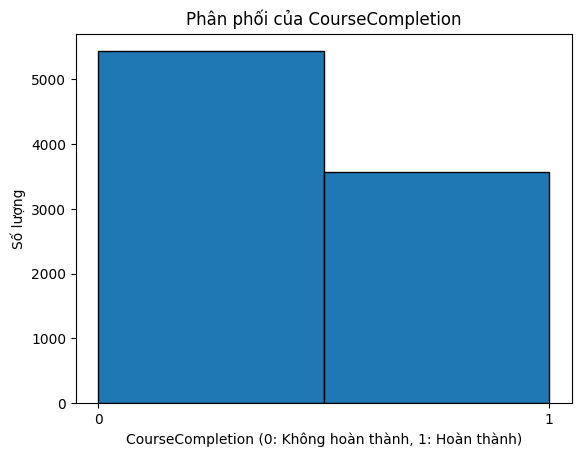

In [ ]:
plt.hist(df['CourseCompletion'], bins=2, edgecolor='black')
plt.title('Phân phối của CourseCompletion')
plt.xlabel('CourseCompletion (0: Không hoàn thành, 1: Hoàn thành)')
plt.ylabel('Số lượng')
plt.xticks([0, 1])
plt.show()

**Kết luận:**

Biểu đồ cho thấy tỷ lệ người không hoàn thành khóa học (khoảng 5400 người) cao hơn đáng kể so với người hoàn thành (3600 người). Điều này có thể cho thấy một số vấn đề liên quan đến chất lượng khóa học, sự phù hợp của khóa học với người học, hoặc sự thiếu động lực của người học.

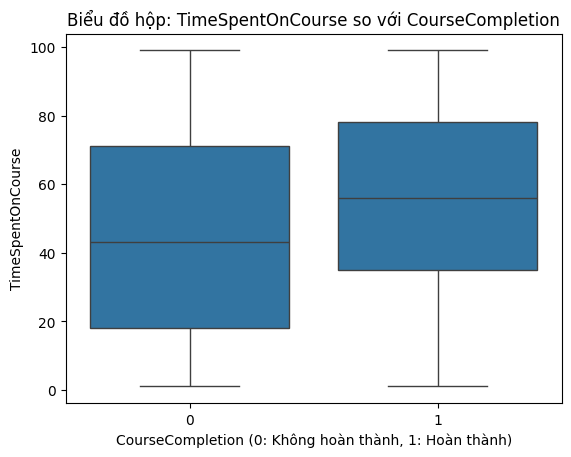

In [ ]:
sns.boxplot(x='CourseCompletion', y='TimeSpentOnCourse', data=df)
plt.title('Biểu đồ hộp: TimeSpentOnCourse so với CourseCompletion')
plt.xlabel('CourseCompletion (0: Không hoàn thành, 1: Hoàn thành)')
plt.ylabel('TimeSpentOnCourse')
plt.xticks([0, 1])  # Đảm bảo chỉ có 2 tick trên trục x
plt.show()

**Nhận xét:**

Biểu đồ so sánh thời gian dành cho khóa học (TimeSpentOnCourse) giữa hai nhóm người: những người hoàn thành khóa học (1) và những người không hoàn thành (0).

Nhóm 0 (Không hoàn thành):
- Trung vị (đường kẻ đậm trong hộp) nằm ở khoảng 40-45.
- Hộp phân vị (phần hộp màu xanh) cho thấy khoảng 25% đến 75% số người dành từ khoảng 20 đến 70 đơn vị thời gian cho khóa học.
- Râu (đường kẻ ngoài cùng) cho thấy phạm vi thời gian dành cho khóa học của nhóm này khá rộng, từ gần 0 đến 100.

Nhóm 1 (Hoàn thành):
- Trung vị nằm ở khoảng 60.
- Hộp phân vị cho thấy khoảng 25% đến 75% số người dành từ khoảng 35 đến 80 đơn vị thời gian cho khóa học.
- Râu cũng cho thấy phạm vi thời gian khá rộng, nhưng có vẻ tập trung hơn so với nhóm 0.

**Kết luận:**

- Nhìn chung, những người hoàn thành khóa học có xu hướng dành nhiều thời gian hơn cho khóa học so với những người không hoàn thành. Điều này được thể hiện qua trung vị và hộp phân vị của nhóm 1 cao hơn nhóm 0.
- Tuy nhiên, cả hai nhóm đều có sự phân tán lớn về thời gian dành cho khóa học, cho thấy có nhiều yếu tố khác ảnh hưởng đến việc hoàn thành khóa học ngoài thời gian.

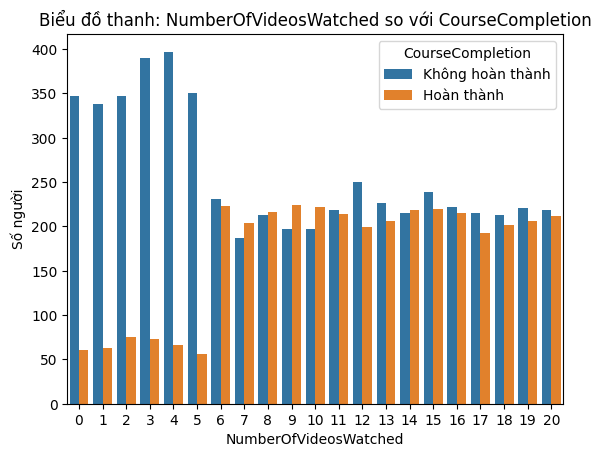

In [ ]:
sns.countplot(x='NumberOfVideosWatched', hue='CourseCompletion', data=df)
plt.title('Biểu đồ thanh: NumberOfVideosWatched so với CourseCompletion')
plt.xlabel('NumberOfVideosWatched')
plt.ylabel('Số người')
plt.legend(title='CourseCompletion', labels=['Không hoàn thành', 'Hoàn thành'])
plt.show()

Nhận xét:

- Biểu đồ so sánh số lượng người xem một số lượng video nhất định và chia họ thành hai nhóm: những người hoàn thành khóa học (Hoàn thành) và những người không hoàn thành (Không hoàn thành).
- Số lượng video đã xem: Biểu đồ hiển thị số lượng video đã xem từ 0 đến 20.
Phân bố số lượng người:
- Nhóm "Không hoàn thành" (màu xanh): Số lượng người cao nhất tập trung ở khoảng 0 đến 5 video đã xem. Sau đó, số lượng giảm dần và ổn định ở mức tương đối thấp từ 6 video trở lên.
- Nhóm "Hoàn thành" (màu cam): Số lượng người tương đối ổn định ở mức trung bình từ khoảng 6 video trở lên. Có một sự tăng nhẹ ở khoảng 12-16 video.

Kết luận:

- Mối tương quan: Biểu đồ cho thấy có một mối tương quan giữa số lượng video đã xem và việc hoàn thành khóa học. Những người xem ít video (đặc biệt là từ 0 đến 5) có xu hướng không hoàn thành khóa học. Ngược lại, những người xem nhiều video hơn có xu hướng hoàn thành khóa học.
- Sự khác biệt rõ rệt: Sự khác biệt rõ rệt nhất giữa hai nhóm nằm ở số lượng video đã xem từ 0 đến 5. Nhóm "Không hoàn thành" có số lượng người cao hơn đáng kể ở khoảng này.
- Ổn định ở nhóm "Hoàn thành": Nhóm "Hoàn thành" cho thấy sự ổn định hơn về số lượng người ở các mức số lượng video đã xem từ 6 trở lên, cho thấy có thể có một ngưỡng nhất định về số lượng video cần xem để tăng khả năng hoàn thành khóa học.

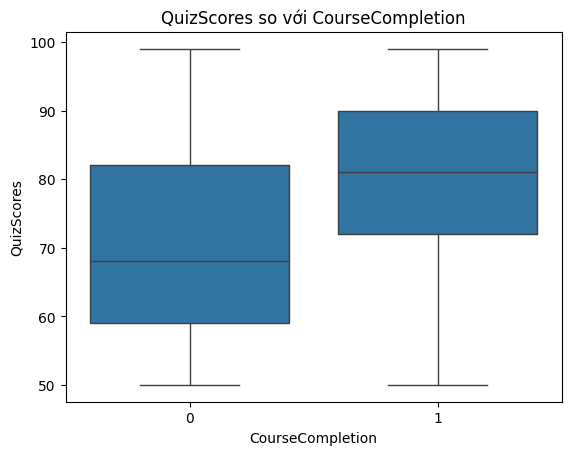

In [ ]:
sns.boxplot(x='CourseCompletion', y='QuizScores', data=df)
plt.title('QuizScores so với CourseCompletion')
plt.show()

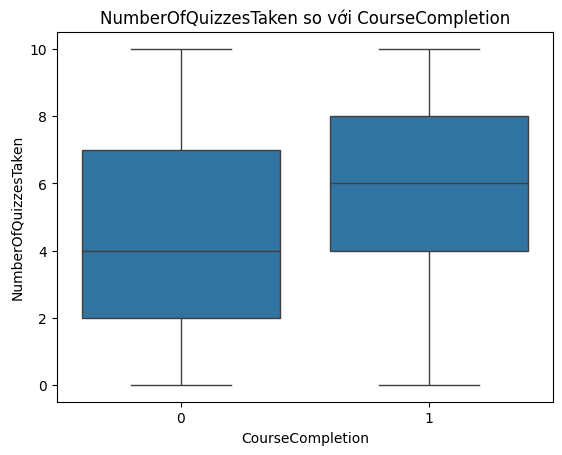

In [ ]:
sns.boxplot(x='CourseCompletion', y='NumberOfQuizzesTaken', data=df)
plt.title('NumberOfQuizzesTaken so với CourseCompletion')
plt.show()

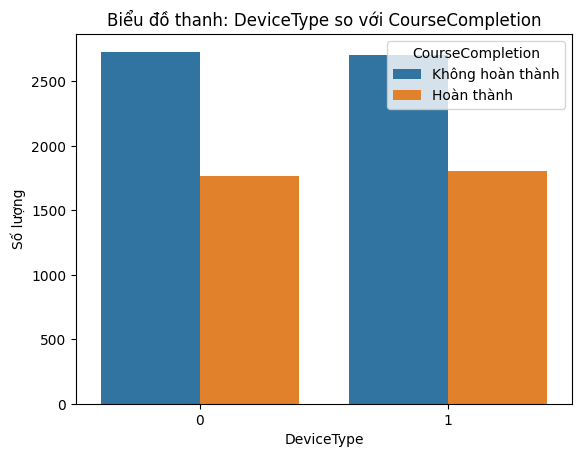

In [ ]:
sns.countplot(x='DeviceType', hue='CourseCompletion', data=df)
plt.title('Biểu đồ thanh: DeviceType so với CourseCompletion')
plt.xlabel('DeviceType')
plt.ylabel('Số lượng')
plt.legend(title='CourseCompletion', labels=['Không hoàn thành', 'Hoàn thành'])
plt.show()

Phân tích biểu đồ thanh:

Biểu đồ thanh sẽ hiển thị số lượng người hoàn thành và không hoàn thành khóa học cho mỗi loại thiết bị. Bạn có thể phân tích các yếu tố sau:

- So sánh tỷ lệ hoàn thành: Bạn có thể so sánh chiều cao của các thanh cho mỗi loại thiết bị để xem liệu có loại thiết bị nào có tỷ lệ hoàn thành cao hơn hay không.
- Xu hướng: Bạn có thể thấy liệu có xu hướng nào giữa loại thiết bị và tỷ lệ hoàn thành hay không. Ví dụ, nếu một loại thiết bị có tỷ lệ hoàn thành cao hơn đáng kể so với các loại thiết bị khác, điều đó có nghĩa là có mối quan hệ giữa loại thiết bị đó và tỷ lệ hoàn thành.

In [ ]:
course_categories = ['CourseCategory_Arts', 'CourseCategory_Business', 'CourseCategory_Health', 'CourseCategory_Programming', 'CourseCategory_Science']

def get_course_category(row):
    for category in course_categories:
        if row[category] == 1:
            return category.replace('CourseCategory_', '')
    return 'Other'

df['CourseCategory'] = df.apply(get_course_category, axis=1)

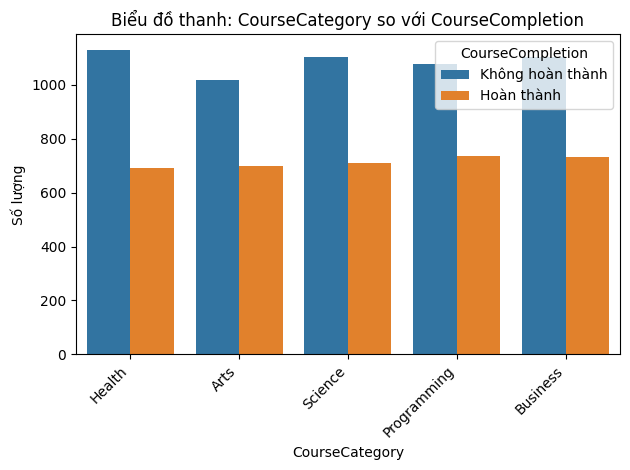

In [ ]:
sns.countplot(x='CourseCategory', hue='CourseCompletion', data=df)
plt.title('Biểu đồ thanh: CourseCategory so với CourseCompletion')
plt.xlabel('CourseCategory')
plt.ylabel('Số lượng')
plt.legend(title='CourseCompletion', labels=['Không hoàn thành', 'Hoàn thành'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Biểu đồ thanh sẽ hiển thị số lượng người hoàn thành và không hoàn thành khóa học cho mỗi danh mục khóa học. Bạn có thể phân tích các yếu tố sau:

- So sánh tỷ lệ hoàn thành: Bạn có thể so sánh chiều cao của các thanh cho mỗi danh mục để xem liệu có danh mục nào có tỷ lệ hoàn thành cao hơn hay không.
- Xu hướng: Bạn có thể thấy liệu có xu hướng nào giữa danh mục khóa học và tỷ lệ hoàn thành hay không. Ví dụ, nếu một danh mục có tỷ lệ hoàn thành cao hơn đáng kể so với các danh mục khác, điều đó có nghĩa là có mối quan hệ giữa danh mục đó và tỷ lệ hoàn thành.

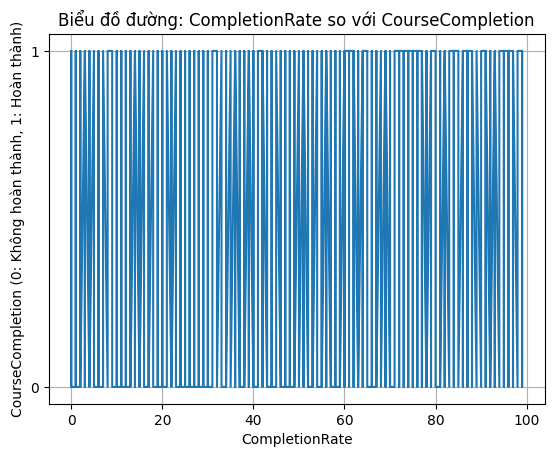

In [ ]:
# Sắp xếp dữ liệu theo CompletionRate để biểu đồ đường có ý nghĩa
df_sorted = df.sort_values(by='CompletionRate')

plt.plot(df_sorted['CompletionRate'], df_sorted['CourseCompletion'])
plt.title('Biểu đồ đường: CompletionRate so với CourseCompletion')
plt.xlabel('CompletionRate')
plt.ylabel('CourseCompletion (0: Không hoàn thành, 1: Hoàn thành)')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

Nhận xét:

Dữ liệu rời rạc: Biểu đồ này hiển thị mối quan hệ giữa tỷ lệ hoàn thành (CompletionRate) và trạng thái hoàn thành khóa học (CourseCompletion) là rời rạc, không liên tục. Điều này được thể hiện qua các đường thẳng đứng lên xuống đột ngột.
Tỷ lệ hoàn thành nhị phân: Trục y (CourseCompletion) chỉ có hai giá trị là 0 (Không hoàn thành) và 1 (Hoàn thành), cho thấy dữ liệu này là nhị phân.
Sự biến động liên tục: Đường biểu diễn dao động liên tục giữa 0 và 1 trên trục y khi tỷ lệ hoàn thành thay đổi từ 0 đến 100. Điều này cho thấy có sự thay đổi đột ngột về trạng thái hoàn thành khóa học khi tỷ lệ hoàn thành thay đổi.
Không có xu hướng rõ ràng: Biểu đồ không cho thấy một xu hướng rõ ràng nào về mối quan hệ giữa tỷ lệ hoàn thành và trạng thái hoàn thành khóa học. Sự dao động ngẫu nhiên cho thấy có thể có nhiều yếu tố khác ảnh hưởng đến việc hoàn thành khóa học ngoài tỷ lệ hoàn thành.

Kết luận:

Biểu đồ này không cung cấp nhiều thông tin hữu ích về mối quan hệ giữa tỷ lệ hoàn thành và trạng thái hoàn thành khóa học do dữ liệu rời rạc và sự biến động ngẫu nhiên.
Có thể biểu đồ này không phù hợp để hiển thị mối quan hệ này. Biểu đồ phân tán (scatter plot) hoặc biểu đồ hộp (boxplot) có thể phù hợp hơn để phân tích mối quan hệ giữa hai biến này.
Cần xem xét các yếu tố khác như thời gian dành cho khóa học, số lượng video đã xem, v.v. để hiểu rõ hơn về các yếu tố ảnh hưởng đến việc hoàn thành khóa học.
Lưu ý:

#Từ EDA rút ra được các biến độc lập sau:
- Completion Rate
- Time Spent On Course
- Number Of Videos Watche
- Number Of Quizzes Taken
- QuizScores


#2. Logistic Regression Models Analysis

In [ ]:
X = df[['CompletionRate', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores']]
Y = df['CourseCompletion']

In [ ]:
X

,CompletionRate,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores
0,20,29,17,3,50
1,65,27,1,5,62
2,63,86,14,2,78
3,95,35,17,10,59
4,18,92,16,0,98
...,...,...,...,...,...
8995,32,37,14,4,54
8996,0,48,7,7,59
8997,70,38,3,3,69
8998,72,70,13,10,79


In [ ]:
Y.unique()

array([0, 1])

In [ ]:
# As usual, adding constant term for intercept
X = sm.add_constant(X)

In [ ]:
# Fit logistic regression model
model = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.441526
         Iterations 7


In [ ]:
# Summary of the model
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8994
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                  0.3425
Time:                        07:46:56   Log-Likelihood:                -3973.7
converged:                       True   LL-Null:                       -6043.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -11.7786      0.261    -45.199      0.000     -12.289     -11.268
CompletionRate            0.0364      0.001     33.123      0.000       0.034       0.039
TimeSpen

Phân tích kết quả hồi quy logistic

 - Biến phụ thuộc (Dep. Variable): CourseCompletion (Hoàn thành khóa học)
 -Mô hình (Model): Logit
 - Số quan sát (No. Observations): 9000
 - Pseudo R-squared: 0.3425 (Cho thấy mô hình giải thích được 34.25% sự biến thiên của biến phụ thuộc)
 - p-value: 0.000 (Cho thấy mô hình có ý nghĩa thống kê)
 - Các biến độc lập (Independent Variables):


1.   CompletionRate (Tỷ lệ hoàn thành): Hệ số dương (0.0364) và p-value < 0.05, cho thấy tỷ lệ hoàn thành càng cao thì khả năng hoàn thành khóa học càng lớn.
TimeSpentOnCourse (Thời gian dành cho khóa học): Hệ số dương (0.0205) và p-value < 0.05, cho thấy thời gian dành cho khóa học càng nhiều thì khả năng hoàn thành khóa học càng lớn.

2.   NumberOfVideosWatched (Số video đã xem): Hệ số dương (0.1310) và p-value < 0.05, cho thấy số video đã xem càng nhiều thì khả năng hoàn thành khóa học càng lớn.

3.   NumberOfQuizzesTaken (Số bài kiểm tra đã làm): Hệ số dương (0.3073) và p-value < 0.05, cho thấy số bài kiểm tra đã làm càng nhiều thì khả năng hoàn thành khóa học càng lớn.

4.   QuizScores (Điểm kiểm tra): Hệ số dương (0.0724) và p-value < 0.05, cho thấy điểm kiểm tra càng cao thì khả năng hoàn thành khóa học càng lớn.

5.   const (Hằng số): Hệ số âm (-11.7786) và p-value < 0.05, cho thấy khi tất cả các biến độc lập bằng 0, khả năng hoàn thành khóa học rất thấp.


Phương án

Dựa trên kết quả phân tích, có thể đưa ra một số phương án sau:

Tập trung vào các yếu tố ảnh hưởng lớn nhất:
- NumberOfQuizzesTaken (Số bài kiểm tra đã làm): Đây là yếu tố có ảnh hưởng lớn nhất đến khả năng hoàn thành khóa học. Cần khuyến khích học viên làm nhiều bài kiểm tra hơn.
- CompletionRate (Tỷ lệ hoàn thành): Cần cải thiện tỷ lệ hoàn thành khóa học bằng cách cung cấp nội dung hấp dẫn, dễ hiểu và phù hợp với nhu cầu của học viên.

Cải thiện chất lượng khóa học:
- QuizScores (Điểm kiểm tra): Cần đảm bảo các bài kiểm tra có chất lượng tốt, đánh giá đúng năng lực của học viên và cung cấp phản hồi chi tiết.
- NumberOfVideosWatched (Số video đã xem): Cần tạo ra các video hấp dẫn, có tính tương tác cao và phù hợp với trình độ của học viên.

Tăng cường tương tác với học viên:
- TimeSpentOnCourse (Thời gian dành cho khóa học): Cần tạo ra môi trường học tập trực tuyến thân thiện, khuyến khích học viên dành nhiều thời gian hơn cho khóa học.
- Cung cấp các kênh hỗ trợ học tập như diễn đàn, nhóm chat, hoặc buổi học trực tuyến.

Theo dõi và đánh giá hiệu quả:
- Theo dõi thường xuyên các chỉ số về tỷ lệ hoàn thành, thời gian học, số video đã xem, số bài kiểm tra đã làm và điểm kiểm tra.
- Phân tích dữ liệu để xác định các yếu tố ảnh hưởng đến khả năng hoàn thành khóa học và đưa ra các điều chỉnh phù hợp.







Huận luyện và chạy mẫu thử:

In [ ]:
X = df[['CompletionRate', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores']]
Y = df['CourseCompletion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.442107
         Iterations 7


In [ ]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:       CourseCompletion   No. Observations:                 7200
Model:                          Logit   Df Residuals:                     7194
Method:                           MLE   Df Model:                            5
Date:                Mon, 17 Mar 2025   Pseudo R-squ.:                  0.3420
Time:                        06:20:05   Log-Likelihood:                -3183.2
converged:                       True   LL-Null:                       -4837.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -11.7882      0.292    -40.376      0.000     -12.360     -11.216
CompletionRate            0.0362      0.001     29.519      0.000       0.034       0.039
TimeSpen

Tổng quan:

- Mô hình: Đây là kết quả của mô hình hồi quy Logistic được sử dụng để dự đoán biến nhị phân "CourseCompletion" (Hoàn thành khóa học).
- Số quan sát: Mô hình được xây dựng dựa trên 7200 quan sát.
- Biến dự đoán: Mô hình sử dụng 5 biến dự đoán: CompletionRate (Tỷ lệ hoàn thành), TimeSpentOnCourse (Thời gian học), NumberOfVideosWatched (Số video đã xem), NumberOfQuizzesTaken (Số lần làm bài kiểm tra) và QuizScores (Điểm kiểm tra).
- Độ phù hợp của mô hình: Giá trị Pseudo R-squared là 0.3421, cho thấy mô hình giải thích được khoảng 34.21% phương sai của biến mục tiêu. Giá trị này ở mức trung bình, cho thấy mô hình có khả năng dự đoán ở mức tương đối.
- Ý nghĩa thống kê: Giá trị p của kiểm định LLR (Likelihood Ratio Test) là 0.000, cho thấy mô hình tổng thể có ý nghĩa thống kê.

Phân tích các hệ số (coef):

- Hằng số (const): Hệ số này là -11.7640, có ý nghĩa thống kê (p < 0.001). Tuy nhiên, trong hồi quy Logistic, hằng số thường không được diễn giải nhiều.
- CompletionRate: Hệ số là 0.0363, có ý nghĩa thống kê (p < 0.001). Điều này cho thấy tỷ lệ hoàn thành khóa học càng cao, khả năng người học hoàn thành khóa học càng lớn.
- TimeSpentOnCourse: Hệ số là 0.0217, có ý nghĩa thống kê (p < 0.001). Điều này cho thấy thời gian học càng nhiều, khả năng người học hoàn thành khóa học càng lớn.
- NumberOfVideosWatched: Hệ số là 0.1306, có ý nghĩa thống kê (p < 0.001). Điều này cho thấy số lượng video đã xem càng nhiều, khả năng người học hoàn thành khóa học càng lớn.
- NumberOfQuizzesTaken: Hệ số là 0.3056, có ý nghĩa thống kê (p < 0.001). Điều này cho thấy số lần làm bài kiểm tra càng nhiều, khả năng người học hoàn thành khóa học càng lớn.
- QuizScores: Hệ số là 0.0715, có ý nghĩa thống kê (p < 0.001). Điều này cho thấy điểm kiểm tra càng cao, khả năng người học hoàn thành khóa học càng lớn.

Khoảng tin cậy (CI):

Khoảng tin cậy 95% (CI) cho tất cả các hệ số đều không chứa giá trị 0, điều này càng củng cố thêm ý nghĩa thống kê của các biến dự đoán.

Kết luận:

- Mô hình hồi quy Logistic này cho thấy các biến dự đoán như tỷ lệ hoàn thành, thời gian học, số lượng video đã xem, số lần làm bài kiểm tra và điểm kiểm tra đều có ảnh hưởng tích cực và có ý nghĩa thống kê đến khả năng người học hoàn thành khóa học.
- Điều này có nghĩa là người học càng dành nhiều thời gian cho khóa học, xem nhiều video, làm nhiều bài kiểm tra và đạt điểm cao, họ càng có khả năng hoàn thành khóa học thành công.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
threshold = 0.5
predicted_classes = np.where(predictions > threshold, 1, 0)
predicted_classes

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
val_correct = np.sum(predicted_classes == y_test)
val_correct

1421

In [ ]:
val_all = np.size(predicted_classes)
val_all

1800

In [ ]:
accuracy = val_correct / val_all
print(f'Accuracy: {accuracy}')

Accuracy: 0.7894444444444444


Nhận xét chung:

- Mô hình đạt độ chính xác khoảng 79.67% trên tập dữ liệu kiểm tra, cho thấy hiệu suất tương đối tốt.
- Tuy nhiên, cần xem xét thêm các chỉ số đánh giá khác để đánh giá toàn diện hơn hiệu suất của mô hình.
- Việc điều chỉnh ngưỡng phân loại có thể giúp cải thiện hiệu suất của mô hình.
- Cần xem xét đặc điểm của bài toán và mục tiêu cụ thể để lựa chọn các chỉ số đánh giá phù hợp.

#3. Visualization

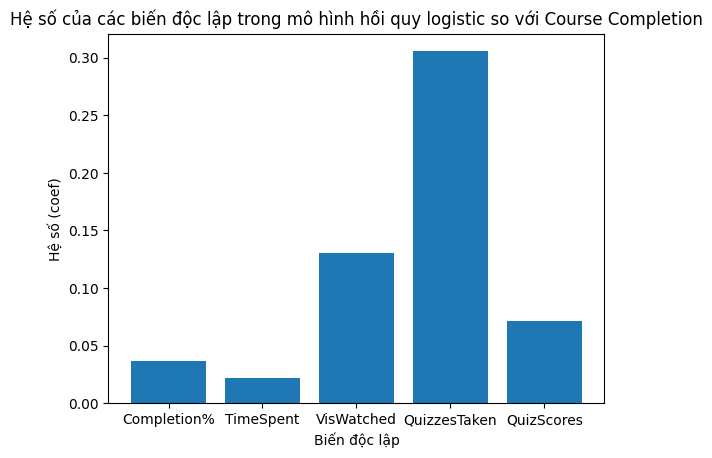

In [ ]:
variables = ['Completion%', 'TimeSpent', 'VisWatched', 'QuizzesTaken', 'QuizScores']
coef = [0.0363, 0.0217, 0.1306, 0.3056, 0.0715]

plt.bar(variables, coef)
plt.xlabel('Biến độc lập')
plt.ylabel('Hệ số (coef)')
plt.title('Hệ số của các biến độc lập trong mô hình hồi quy logistic so với Course Completion')
plt.show()

#**Gợi ý hành động:**

1. **Khuyến khích làm bài kiểm tra:** Thiết kế các bài kiểm tra hấp dẫn, đa dạng và có tính thử thách để khuyến khích người học làm bài kiểm tra thường xuyên.
2. **Tạo nội dung video hấp dẫn:** Tạo các video ngắn gọn, súc tích, dễ hiểu và có tính tương tác cao để thu hút người học xem video. (outcomes 1)
3. **Đưa ra phản hồi kịp thời:** Đưa ra phản hồi chi tiết và kịp thời cho các bài kiểm tra để giúp người học hiểu rõ điểm mạnh, điểm yếu và cải thiện kết quả học tập. (outcome 2)
4. **Tạo môi trường học tập linh hoạt:** Tạo môi trường học tập linh hoạt, cho phép người học tự do lựa chọn thời gian và địa điểm học tập phù hợp với bản thân.